<a href="https://colab.research.google.com/github/MehmetSemerci/CNG562-MehmetSemerci/blob/master/SEMERCI_otto_group_product_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

url = 'https://raw.githubusercontent.com/MehmetSemerci/CNG562-MehmetSemerci/master/OttoTrain.csv'
df = pd.read_csv(url)


df[df.columns[94]]=df[df.columns[94]].replace("Class_1",1)
df[df.columns[94]]=df[df.columns[94]].replace("Class_2",2)
df[df.columns[94]]=df[df.columns[94]].replace("Class_3",3)
df[df.columns[94]]=df[df.columns[94]].replace("Class_4",4)
df[df.columns[94]]=df[df.columns[94]].replace("Class_5",5)
df[df.columns[94]]=df[df.columns[94]].replace("Class_6",6)
df[df.columns[94]]=df[df.columns[94]].replace("Class_7",7)
df[df.columns[94]]=df[df.columns[94]].replace("Class_8",8)
df[df.columns[94]]=df[df.columns[94]].replace("Class_9",9)


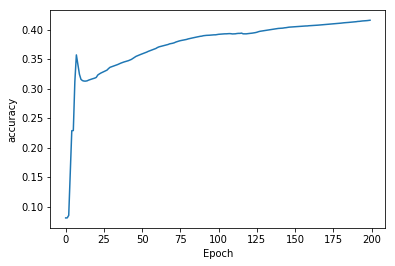

Test Accuracy:  0.41313833
MSE: 0.6875


In [41]:
def one_hot_encode(labels):
    n_labels = len(labels)
    n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels,n_unique_labels))
    one_hot_encode[np.arange(n_labels),labels]=1
    return one_hot_encode



X = df[df.columns[1:94]].values
y = df[df.columns[94]]

encoder = LabelEncoder()
encoder.fit(y)
y=encoder.transform(y)
Y = one_hot_encode(y)
X, Y = shuffle(X,Y,random_state=1)

train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.2,random_state=1)

learning_rate = 0.3
training_epochs = 200
cost_history = np.empty(shape=[1],dtype=float)
n_dim = X.shape[1]

n_class=9

n_hidden_1=10
n_hidden_2=10
n_hidden_3=10
n_hidden_4=10

x = tf.placeholder(tf.float32,[None,n_dim])
W = tf.Variable(tf.zeros([n_dim,n_class]))
b = tf.Variable(tf.zeros([n_class]))
y_= tf.placeholder(tf.float32,[None,n_class])




def multilayer_perceptron(x,weights,biases):
    
    layer_1 = tf.add(tf.matmul(x,weights['h1']),biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    
    layer_2 = tf.add(tf.matmul(layer_1,weights['h2']),biases['b2'])
    layer_2= tf.nn.sigmoid(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2,weights['h3']),biases['b3'])
    layer_3 = tf.nn.sigmoid(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3,weights['h4']),biases['b4'])
    layer_4 = tf.nn.sigmoid(layer_4)
    
    out_layer = tf.matmul(layer_4,weights['out'])+biases['out']
    return out_layer

weights ={
    'h1':tf.Variable(tf.truncated_normal([n_dim,n_hidden_1])),
    'h2':tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2])),
    'h3':tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3])),
    'h4':tf.Variable(tf.truncated_normal([n_hidden_3,n_hidden_4])),
    'out':tf.Variable(tf.truncated_normal([n_hidden_3,n_class])),
}

biases ={
    'b1': tf.Variable(tf.truncated_normal([n_hidden_1])),
    'b2': tf.Variable(tf.truncated_normal([n_hidden_2])),
    'b3': tf.Variable(tf.truncated_normal([n_hidden_3])),
    'b4': tf.Variable(tf.truncated_normal([n_hidden_4])),
    'out': tf.Variable(tf.truncated_normal([n_class])),
}

init = tf.global_variables_initializer()
saver =tf.train.Saver()

y=multilayer_perceptron(x,weights,biases)

cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y,labels=y_))
training_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

sess =tf.Session()
sess.run(init)


mse_history = []
accuracy_history =[]

for epoch in range(training_epochs):
    sess.run(training_step,feed_dict={x:train_x,y_:train_y})
    cost = sess.run(cost_function,feed_dict={x:train_x,y_:train_y})
    cost_history = np.append(cost_history,cost)
    correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
    
    pred_y = sess.run(y,feed_dict={x:test_x})
    mse = tf.reduce_mean(tf.square(pred_y - test_y))
    mse_=sess.run(mse)
    mse_history.append(mse_)
    accuracy = (sess.run(accuracy,feed_dict={x: train_x, y_:train_y}))
    accuracy_history.append(accuracy)
    
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.show()

correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))
print("Test Accuracy: ",(sess.run(accuracy, feed_dict={x:test_x,y_:test_y})))


pred_y = sess.run(y,feed_dict={x:test_x})
mse = tf.reduce_mean(tf.square(pred_y -test_y))
print("MSE: %.4f"%sess.run(mse))
    
    
    

In [43]:

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(train_x, train_y)

predictknn = knn.predict(test_x)

accuracy_score(test_y,predictknn)

0.7554137039431157

# New Section